# Calculating Optical Flow
Below is an example of how to calculate optical flow and use the output files generated by the pre-process script.

In [4]:
%matplotlib inline 
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

#Open a video from our dataset
cap = cv2.VideoCapture("../data/UCF-101/Archery/v_Archery_g01_c01.avi")

#Start reading frames
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

#Checking the number of frames in the video
length = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
print length

#Store the flow images in a list for now
flow_vid = []
flow_vid.append(np.zeros(frame1.shape))

#Loop through all of the frames and calculate optical flow
while(1):
    ret, frame2 = cap.read()
    
    #If no more frames can be read then break out of our loop
    if(not(ret)):
        break
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    
    flow_vid.append(rgb)

    prvs = next

#Close the file
cap.release()

#Convert our list of flow frames to an array
flow_vid = np.array(flow_vid)
print flow_vid.shape

#Store as a .mat file
sio.savemat('../data/pre-process/Archery/v_Archery_g01_c01_oflow.mat', {'flow':flow_vid})

131
(131, 240, 320, 3)


# How to Import Flow Images

(131, 240, 320, 3)


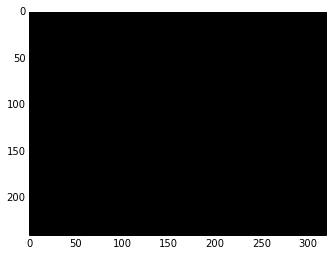

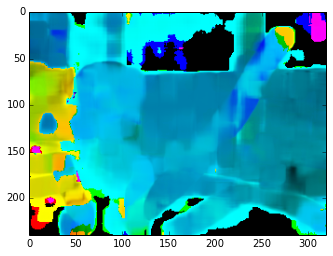

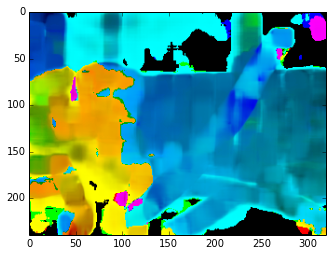

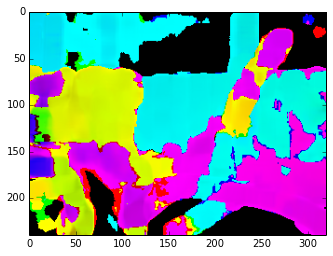

In [2]:
mat_contents = sio.loadmat('v_Archery_g01_c01_oflow.mat')
flow = mat_contents['flow']

print flow.shape
plt.imshow(flow[0,:,:,:])

plt.figure()
plt.imshow(flow[1,:,:,:])

plt.figure()
plt.imshow(flow[2,:,:,:])

plt.figure()
plt.imshow(flow[3,:,:,:])